# Analysis Set up

In [2]:
import pandas as pd   #Importing packages
import matplotlib.pyplot as plt
import numpy as np


`Data Upload and duplicate/blank value fix`

In [3]:
#upload vehicle csv reading teh top lines
vehicles = pd.read_csv("C:\\Users\\treve\\sprint5project\\vehicles_us.csv")
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
vehicles.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Change NaN values in `is_4wd` column to 0 

In [6]:
print(vehicles['is_4wd'].value_counts(dropna=False))
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)
vehicles['is_4wd'].value_counts(dropna=False)



is_4wd
NaN    25953
1.0    25572
Name: count, dtype: int64


is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

Checking for Duplicates

In [7]:
vehicles.duplicated().sum()  #No duplicates

0

# Create general aggregates and charts

In [8]:
vehicles['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [9]:
vehicles['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [10]:
# vehicles.plot(kind='scatter',
#               x='days_listed',
#               y='price')

`look at type data`

In [11]:
vehicles['type'].value_counts()


type
SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64

In [12]:
#Change pickup to truck as they are essentially the same type
vehicles['type'] = vehicles['type'].replace('pickup','truck')
type_counts = vehicles['type'].value_counts().head()

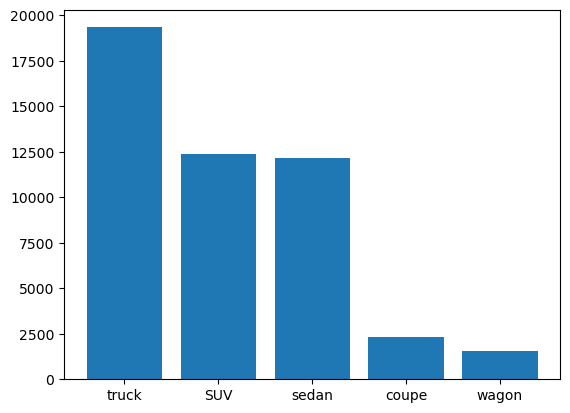

In [13]:
plt.bar(type_counts.index,type_counts.values)

plt.show()

`Look at paint color data`

In [14]:
print(vehicles['paint_color'].value_counts())
top_paint_counts = vehicles['paint_color'].value_counts().head()

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64


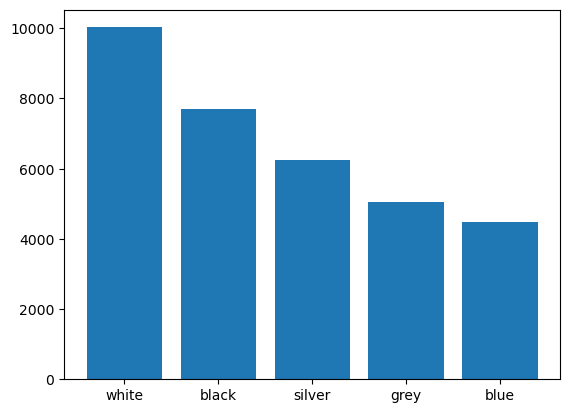

In [15]:
plt.bar(top_paint_counts.index,top_paint_counts.values)

plt.show()

`Car Makes`

In [16]:
vehicles['model']

0                bmw x5
1            ford f-150
2        hyundai sonata
3            ford f-150
4          chrysler 200
              ...      
51520     nissan maxima
51521       honda civic
51522    hyundai sonata
51523    toyota corolla
51524     nissan altima
Name: model, Length: 51525, dtype: object

Going to want to split the `model` column into two columns that designate the make and model of the car

In [17]:
vehicles[['car_make', 'car_model']] = vehicles['model'].str.split(' ', n=1, expand=True)
vehicles[['model','car_make','car_model']]

,model,car_make,car_model
0,bmw x5,bmw,x5
1,ford f-150,ford,f-150
2,hyundai sonata,hyundai,sonata
3,ford f-150,ford,f-150
4,chrysler 200,chrysler,200
...,...,...,...
51520,nissan maxima,nissan,maxima
51521,honda civic,honda,civic
51522,hyundai sonata,hyundai,sonata
51523,toyota corolla,toyota,corolla


In [20]:
vehicles['car_make'].value_counts()

car_make
ford             12672
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswagen         869
chrysler           838
kia                585
cadillac           322
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: count, dtype: int64

In [25]:
pivot_makes = vehicles.pivot_table(index='car_make',columns='type',aggfunc='count',fill_value=0)
pivot_makes
# pivot_makes.plot(kind='bar', stacked=True)

car_model                                                   \
type                SUV bus convertible coupe hatchback mini-van offroad   
car_make                                                                   
acura                 3   0           0     0         0        0       0   
bmw                 248   0           0     0         1        0       0   
buick               259   0           0     0         0        0       0   
cadillac            308   0           0     0         0        0       0   
chevrolet          2285   0         236   985        34        2      14   
chrysler              1   0          12     4         1      238       0   
dodge                 7   0           0     9         1      396       2   
ford               2222  23         153   828       246        1       9   
gmc                 642   0           0     0         0        0       6   
honda               883   0           1   365        43      320       2   
hyundai             247   1           0    11        29        1       0   
jeep               2780   0          42     0         3        0     162   
kia                 273   0           0     0        95        2       0   
mercedes-benz         0   0           0     0         0        0       0   
nissan              580   0           0    67        94        0       1   
ram                   3   0           0     0         0        0       1   
subaru              456   0           0     2       146        0       0   
toyota             1208   0           2    22       350      201      17   
volkswagen            0   0           0    10         4        0       0   

                                 ... transmission                           \
type          other sedan truck  ...  convertible coupe hatchback mini-van   
car_make                         ...                                         
acura             2   231     0  ...            0     0         0        0   
bmw               0     5     3  ...            0     0         1        0   
buick             0     1     2  ...            0     0         0        0   
cadillac          0     2    12  ...            0     0         0        0   
chevrolet        52  1700  5154  ...          236   985        34        2   
chrysler          3   541     0  ...           12     4         1      238   
dodge             5   402   239  ...            0     9         1      396   
ford             33  2047  6808  ...          153   828       246        1   
gmc               1     0  1722  ...            0     0         0        0   
honda            15  1624     7  ...            1   365        43      320   
hyundai          12   848     1  ...            0    11        29        1   
jeep             71     4    35  ...           42     0         3        0   
kia               2    54     1  ...            0     0        95        2   
mercedes-benz     0     0     0  ...            0     0         0        0   
nissan           22  1691   632  ...            0    67        94        0   
ram               8     1  3293  ...            0     0         0        0   
subaru            2   149     0  ...            0     2       146        0   
toyota           26  2045  1432  ...            2    22       350      201   
volkswagen        2   809     0  ...            0    10         4        0   

                                                    
type          offroad other sedan truck  van wagon  
car_make                                            
acura               0     2   231     0    0     0  
bmw                 0     0     5     3    1     9  
buick               0     0     1     2    1     8  
cadillac            0     0     2    12    0     0  
chevrolet          14    52  1700  5154    5   144  
chrysler            0     3   541     0   37     1  
dodge               2     5   402   239  190     4  
ford                9    33  2047  6808  111   191  
gmc                 6     1     0  1722  